# **LOAN PREDICTION PROJECT**

### **Import Packages**

In [0]:
import pandas as pd
import numpy as  np 
import matplotlib.pyplot as plt
import seaborn as sns

### **Read and Visualize the data**

In [0]:
df= pd.read_csv('train.csv')

In [282]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### **Preprocessing the data**
Fill nan values by the median

In [0]:
df = df.fillna(df.median())

Encoding Categorical Values

In [0]:
df['Loan_Status'] = df.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

In [285]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

**Although the gender columns seems important when we see the value_counts we see that there is a bias since most of the data correspond to male**

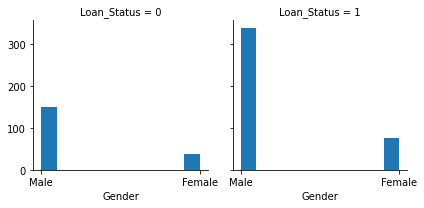

In [286]:
grid = sns.FacetGrid(df, col='Loan_Status')
grid.map(plt.hist, 'Gender')

In [287]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [0]:
df= df.replace({"Gender":{"Male":1, "Female":0 }})
df =df.replace({"Married" :{"Yes":1, "No":0}})

In [0]:
    df['Dependents'] = df['Dependents'].replace('3+', '3')

In [0]:
df['Dependents']=pd.to_numeric(df['Dependents'], errors='coerce')

In [291]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1.0,1.0,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1.0,1.0,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1.0,1.0,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [292]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
df= df.replace({"Self_Employed":{"Yes":1, "No":0 }})

In [294]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [0]:
df= df.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

In [296]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,Urban,1


In [0]:
df = df.drop(columns=['Loan_ID'])

In [298]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [0]:
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})

In [300]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [301]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.762938,0.781759,0.140893,5403.459283,1621.245798,145.752443,342.410423,0.855049,1.087948,0.687296
std,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,84.107233,64.428629,0.352339,0.815081,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


**Refill nan and make all columns numeric**

In [0]:
df.fillna(df.median(), inplace=True)
columns = df.columns
for column in columns:
  df[column] = pd.to_numeric(df[column], errors='coerce')


**Checking if there is nan values**

In [306]:
col_names= df.columns.tolist()
for column in col_names:
  print("Valores Nulos en <{0}>: <{1}>".format(column,df[column].isnull().sum()))

Valores Nulos en <Gender>: <0>
Valores Nulos en <Married>: <0>
Valores Nulos en <Dependents>: <0>
Valores Nulos en <Education>: <0>
Valores Nulos en <Self_Employed>: <0>
Valores Nulos en <ApplicantIncome>: <0>
Valores Nulos en <CoapplicantIncome>: <0>
Valores Nulos en <LoanAmount>: <0>
Valores Nulos en <Loan_Amount_Term>: <0>
Valores Nulos en <Credit_History>: <0>
Valores Nulos en <Property_Area>: <0>
Valores Nulos en <Loan_Status>: <0>


**Visualize the Correlation  between the variables**

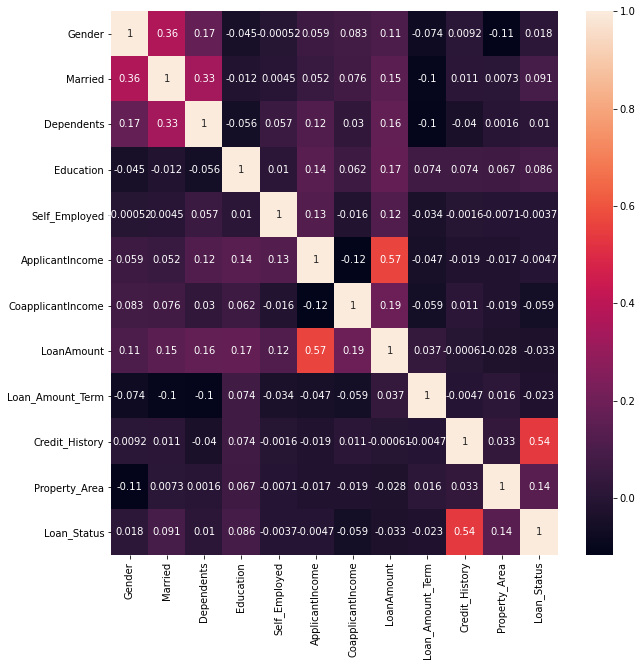

In [307]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()


**Selecting the variables with the higher  absulute value correlation**

In [0]:
def correlationdrop(df, sl):
  columns = df.columns
  for column in columns:
      C=abs(df[column].corr(df['Loan_Status']))
      if C < sl:
        df=df.drop(columns=[column])
  return df

df= correlationdrop(df,0.05)

In [309]:
df

,Married,Education,CoapplicantIncome,Credit_History,Property_Area,Loan_Status
0,0.0,1,0.0,1.0,1,1
1,1.0,1,1508.0,1.0,0,0
2,1.0,1,0.0,1.0,1,1
3,1.0,0,2358.0,1.0,1,1
4,0.0,1,0.0,1.0,1,1
...,...,...,...,...,...,...
609,0.0,1,0.0,1.0,0,1
610,1.0,1,0.0,1.0,0,1
611,1.0,1,240.0,1.0,1,1
612,1.0,1,0.0,1.0,1,1


### **Visualize the data**

In [267]:
df.groupby(['Education','Property_Area'])['Loan_Status'].count()

Education  Property_Area
0          0                 42
           1                 39
           2                 42
1          0                121
           1                141
           2                169
Name: Loan_Status, dtype: int64

In [268]:
df.groupby(['Education','Married'])['Loan_Status'].count()

Education  Married
0          0.0         42
           1.0         81
1          0.0        150
           1.0        281
Name: Loan_Status, dtype: int64

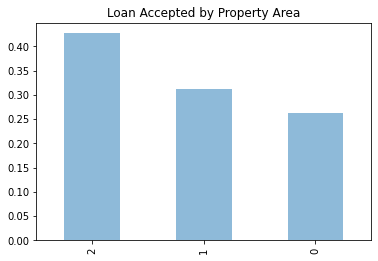

In [269]:
df.Property_Area[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
plt.show()

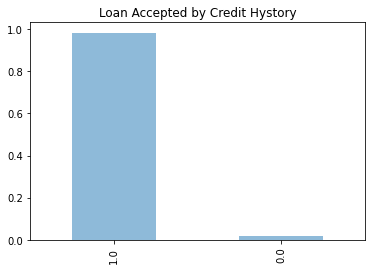

In [270]:
df.Credit_History[df.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit Hystory')
plt.show()

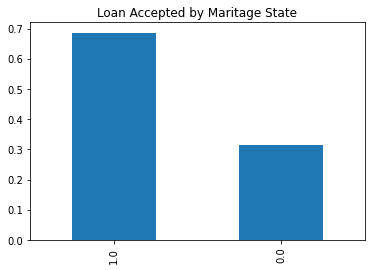

In [271]:
df.Married[df.Loan_Status==1].value_counts(normalize = True).plot(kind = 'bar')
plt.title('Loan Accepted by Maritage State')
plt.show()

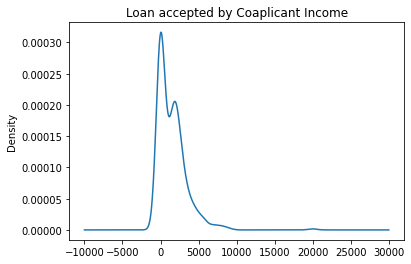

In [321]:
df.CoapplicantIncome[df.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

## **Model**

**Choose the dependent and independent columns**

In [0]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

**Scaling the data**

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X= sc.fit_transform(x)

**Split the data on the train and test datasets**

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.2, random_state= 0)

### **Support Vector Classifier**

In [0]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma= 0.2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

**Cross Validation**

In [317]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[14 19]
 [ 2 88]]
Accuracy: 80.44 %
Standard Deviation: 4.59 %


**Grid Seach**

In [315]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.65 %
Best Parameters: {'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}
